<a href="https://colab.research.google.com/github/MoNasr0/4th-Engineering-labs/blob/main/AI_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,confusion_matrix # calc acc, precision, recall

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/drug-classification/drug200.csv


<a id='1'></a>
# Read Data and PreCheck

In [ ]:
df = pd.read_csv("../input/drug-classification/drug200.csv")

In [ ]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<a id='4'></a>
### Age Variable

In [ ]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


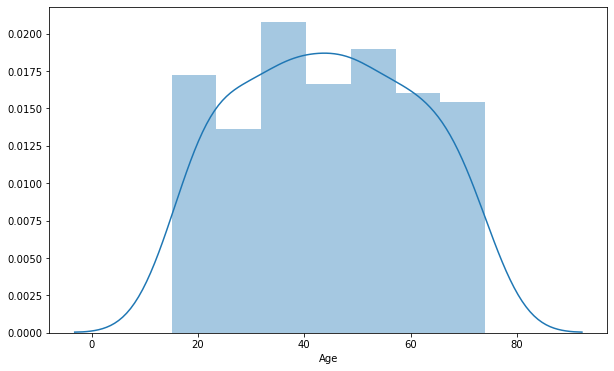

In [ ]:
# Age distribution
plt.figure(figsize = (10,6))
sns.distplot(df.Age)
plt.show()

<a id='5'></a>
### Sex Variable

In [ ]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

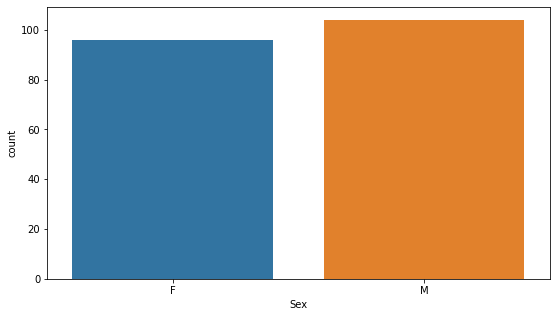

In [ ]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

<a id='6'></a>
### BP Variable

In [ ]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

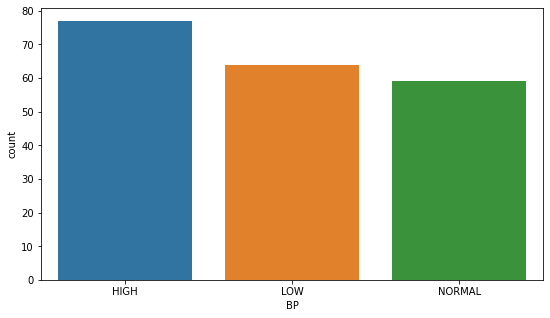

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.BP)
plt.show()

<a id='7'></a>
### Cholesterol Variable

In [ ]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

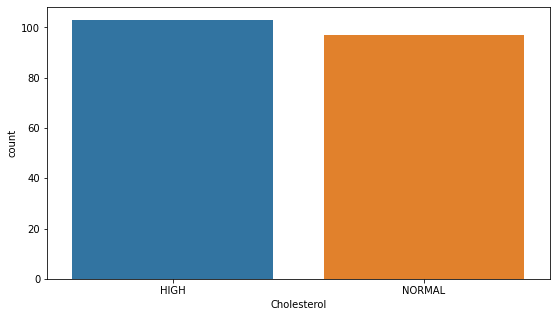

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.Cholesterol)
plt.show()

<a id='8'></a>
### Na_to_K Variable

In [ ]:
print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.08448499999999


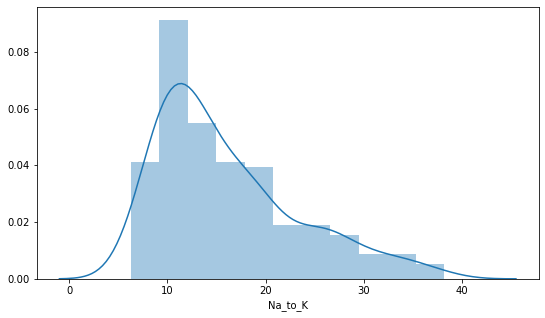

In [ ]:
plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

<a id='9'></a>
### Drug Variable

In [ ]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

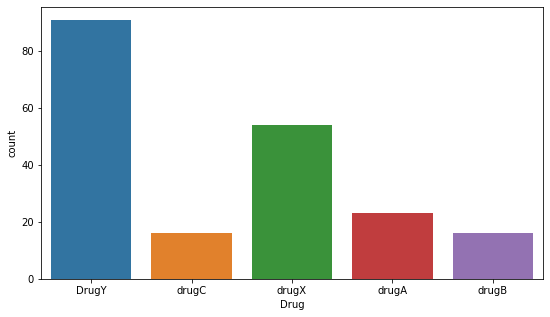

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.Drug)
plt.show()

<a id='11'></a>
## Age -- Drug

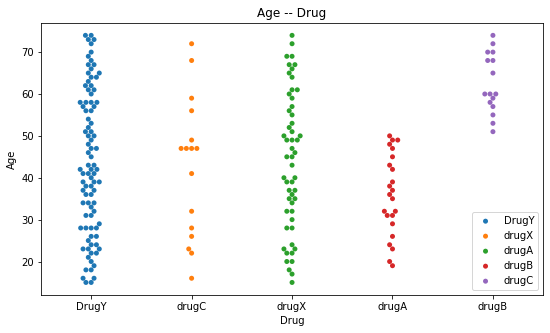

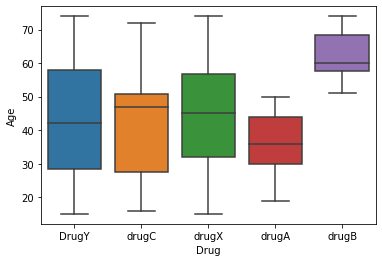

In [ ]:
# show distribute of drugs by ages

# 1: with plotting
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

# 2: with boxplot to show start, end, max points
sns.boxplot(data=df, x = "Drug", y = "Age")

In [ ]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


<a id='12'></a>
## Sex -- Drug

In [ ]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


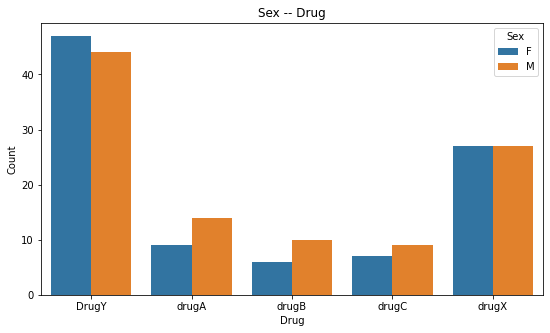

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

<a id='13'></a>
## BP -- Drug

In [ ]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


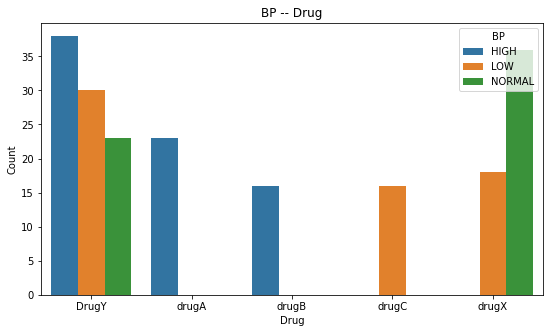

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

<a id='14'></a>
## Na_to_K -- Drug

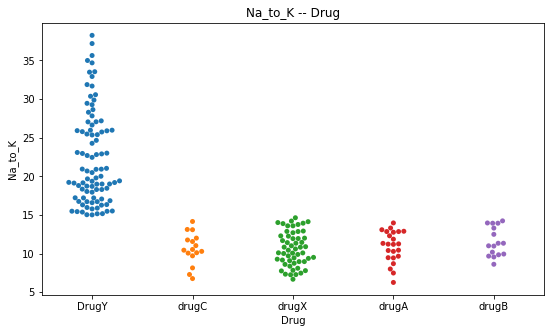

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K -- Drug")
plt.show()

<a id='15'></a>
## Cholesterol -- Drug

In [ ]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


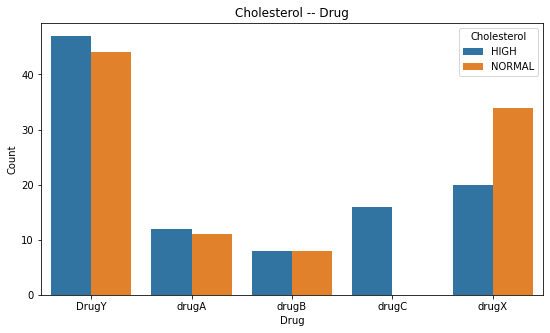

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

<a id='16'></a>
## Na_to_K -- BP -- Drug

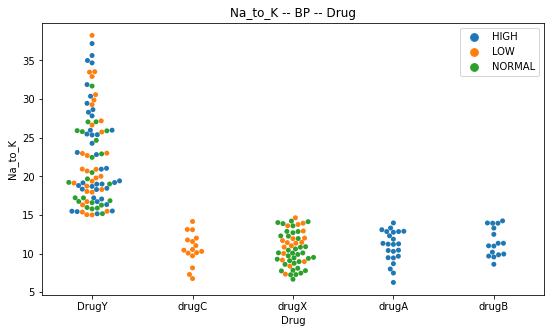

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

<a id='17'></a>
# Preparing Data and Feature Engineering

<a id='19'></a>
### Na_to_K_Bigger_Than_15

If Na_to_K is bigger than 15, it is always drugY.

In [ ]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [ ]:
df_NaK15 = df.groupby(["Drug","Na_to_K_Bigger_Than_15"]).size().reset_index(name = "Count")
df_NaK15

,Drug,Na_to_K_Bigger_Than_15,Count
0,DrugY,1,91
1,drugA,0,23
2,drugB,0,16
3,drugC,0,16
4,drugX,0,54


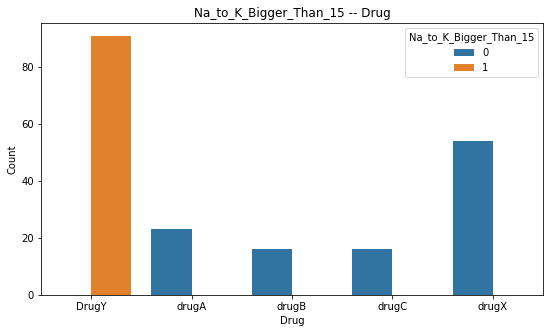

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

In [ ]:
# converting from object to int
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [ ]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,0
2,47,1,1,0,43,3,0
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


<a id='21'></a>
## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# x train an test on features
x = df.drop(["Drug"],axis=1)
# y train and test on only drugs
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


<a id='23'></a>
## KNN Model

<a id='24'></a>
### Default Parameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn_train = np.mean(cross_val_score(knn, y_test, y_pred, cv=5) * 100)

knn_accuracy = np.mean(knn.score(x_test,y_test) * 100)  #accuracy_score(y_test, y_pred)
knn_precision = np.mean(precision_score(y_test, y_pred, average=None) * 100)
knn_recall = round(np.mean(recall_score(y_test, y_pred, average=None) * 100))

print("Train Score:",str(knn_train) + "%")
print("Accuracy Score:",str(knn_accuracy) + "%")
print("Precision Score : ", str(knn_precision) + "%")
print("Recall Score : ", str(knn_recall) + "%")

Train Score: 57.5%
Accuracy Score: 65.0%
Precision Score :  56.25%
Recall Score :  56.0%


<a id='25'></a>
### GridSearchCV on KNN

In [ ]:
# finding the optimal parameter values from a given set of parameters in a grid
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

# train
knn_train_cv = knn_cv.best_score_ * 100
# test
knn_accuracy_cv = knn_cv.score(x_test,y_test) * 100

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",str(knn_train_cv) + "%")
print("Accuracy Score:",str(knn_accuracy_cv) + "%")

Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Train Score: 75.625%
Accuracy Score: 70.0%


<a id='26'></a>
# Random Forest

<a id='27'></a>
### Default Parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
rfc_train = np.mean(cross_val_score(rfc, x_train, y_train, cv=5) * 100)

rfc_accuracy = np.mean(rfc.score(x_test,y_test) * 100)
rfc_precision = np.mean(precision_score(y_test, y_pred, average=None) * 100)
rfc_recall = round(np.mean(recall_score(y_test, y_pred, average=None) * 100))


print("Train Score:",str(rfc_train) + "%")
print("Accuracy Score:",str(rfc_accuracy) + "%")
print("Precision Score : ", str(rfc_precision) + "%")
print("Recall Score : ", str(rfc_recall) + "%")

Train Score: 98.125%
Accuracy Score: 97.5%
Precision Score :  98.33333333333333%
Recall Score :  96.0%


<a id='28'></a>
### GridSearchCV on Random Forest

In [ ]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']}

rfc = RandomForestClassifier(random_state = 42)
rfc_cv = GridSearchCV(rf,grid,cv=5)
rfc_cv.fit(x_train,y_train)

# train
rfc_train_cv = rfc_cv.best_score_ * 100
# test
rfc_accuracy_cv = rfc_cv.score(x_test,y_test) * 100

print("Hyperparameters:",rfc_cv.best_params_)
print("Train Score:",str(rfc_train_cv) + "%")
print("Accuracy Score:",str(rfc_accuracy_cv) + "%")

Hyperparameters: {'criterion': 'entropy', 'n_estimators': 100}
Train Score: 98.75%
Accuracy Score: 97.5%


<a id='29'></a>
# SVM Classifier

<a id='30'></a>
### Default Parameters

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
svm_train = np.mean(cross_val_score(svc, x_train, y_train, cv=5) * 100)

svm_accuracy = np.mean(svc.score(x_test,y_test) * 100)
svm_precision = np.mean(precision_score(y_test, y_pred, average=None) * 100)
svm_recall = round(np.mean(recall_score(y_test, y_pred, average=None) * 100))


print("Train Score:",str(svm_train) + "%")
print("Accuracy Score:",str(svm_accuracy) + "%")
print("Precision Score : ", str(svm_precision) + "%")
print("Recall Score : ", str(svm_recall) + "%")

Train Score: 71.25%
Accuracy Score: 65.0%
Precision Score :  27.916666666666664%
Recall Score :  40.0%


<a id='31'></a>
### GridSearchCV on SVM

In [ ]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(x_train,y_train)

# train
svm_train_cv = svm_cv.best_score_ * 100
# test
svm_accuracy_cv = svm_cv.score(x_test,y_test) * 100

print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",str(svm_train_cv) + "%")
print("Accuracy Score:",str(svm_accuracy_cv) + "%")

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 98.75%
Accuracy Score: 97.5%


<a id='32'></a>
# Conclusion

In [ ]:
import pandas as pd
matrix = pd.DataFrame({
    "Model" : ["KNN", "Random Forest", "SVM"],
    "Default_Accuracy" : [knn_accuracy, rfc_accuracy, svm_accuracy],
    "GridCV_Accuracy" : [knn_accuracy_cv, rfc_accuracy_cv, svm_accuracy_cv],
    "Precision" : [knn_precision, rfc_precision, svm_precision],
    "Recall" :[knn_recall, rfc_recall, svm_recall],
})
print(matrix)

           Model  Default_Accuracy  GridCV_Accuracy  Precision  Recall
0            KNN              65.0             70.0  56.250000    56.0
1  Random Forest              97.5             97.5  98.333333    96.0
2            SVM              65.0             97.5  27.916667    40.0
